In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import pickle

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata


In [4]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durgaprasad.terli\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\durgaprasad.terli\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df=pd.read_csv(r'C:\Users\durgaprasad.terli\python_class\twitt30k.csv')

In [7]:
df.head()



,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0


In [8]:
df.shape

(30000, 2)

In [9]:
df.columns


Index(['twitts', 'sentiment'], dtype='object')

In [10]:
#sentiment count
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

In [196]:
X=df['twitts']
print(df['twitts'])

0             @robbiebronniman Sounds like a great night. 
1        Damn the person who stolde my wallet !!!!!  Ma...
2        Greetings from the piano bench  (photo) http:/...
3        @drewryanscott i love it!! i love you!! haha f...
4        @kissthestars Pretty pretty pretty please, pak...
                               ...                        
29995    @Calumfan1 is it in any way related to photosh...
29996                     @Swiz_NZ really? wow thats crap 
29997    At the 2010 lexus HS250h press event.  Again, ...
29998    @karmicunderpath ooooh now there's a nice thou...
29999    @mariap91 i'd usually ask you about the sun an...
Name: twitts, Length: 30000, dtype: object


In [183]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on  twitts column
df['twitts']=df['twitts'].apply(denoise_text)

In [182]:
df['twitts']

0                   robbiebronniman sound like great night
1        damn person stold wallet may karma come back b...
2              greet piano bench photo httptwitpiccom6oe8i
3        drewryanscott love love haha forget hugyou giv...
4        kissthestar pretti pretti pretti pleas pakidow...
                               ...                        
29995                    calumfan1 ani way relat photoshop
29996                              swiz_nz realli wow crap
29997    2010 lexu hs250h press event cant tell anythin...
29998                   karmicunderpath ooooh nice thought
29999    mariap91 id usual ask sun school sinc write wo...
Name: twitts, Length: 30000, dtype: object

In [25]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on  twitts column
df['twiits']=df['twitts'].apply(remove_special_characters)

In [34]:
df['twitts']

0                   robbiebronniman sound like great night
1        damn person stold wallet may karma come back b...
2              greet piano bench photo httptwitpiccom6oe8i
3        drewryanscott love love haha forget hugyou giv...
4        kissthestar pretti pretti pretti pleas pakidow...
                               ...                        
29995                    calumfan1 ani way relat photoshop
29996                              swiz_nz realli wow crap
29997    2010 lexu hs250h press event cant tell anythin...
29998                   karmicunderpath ooooh nice thought
29999    mariap91 id usual ask sun school sinc write wo...
Name: twitts, Length: 30000, dtype: object

In [27]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on  twitts column
df['twitts']=df['twiits'].apply(simple_stemmer)

In [166]:
df['twitts'].head()

0               robbiebronniman sound like great night
1    damn person stold wallet may karma come back b...
2          greet piano bench photo httptwitpiccom6oe8i
3    drewryanscott love love haha forget hugyou giv...
4    kissthestar pretti pretti pretti pleas pakidow...
Name: twitts, dtype: object

In [31]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [32]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on  twitts column
df['twitts']=df['twitts'].apply(remove_stopwords)

{'ours', 'hadn', 'where', "aren't", 'why', 'we', 'few', 'were', 'do', 'hers', 'll', "you'll", 'was', 'or', 'both', 'some', 'how', 'i', 'my', 'hasn', "weren't", 'is', 'out', 'now', 'those', 'into', 'nor', 'myself', 'her', 'with', 'it', 'but', 'until', 'such', 'wasn', 'when', 's', 'yourselves', 'yourself', 'what', 'wouldn', 'doesn', "wasn't", 'too', "it's", 'am', 'are', 'who', 'on', "mightn't", 'under', 'between', "hadn't", 'again', 'our', 'because', 'through', 'once', 'doing', 'shan', 'mustn', 'does', 'shouldn', 'he', 'of', 'your', 'has', 'off', 'just', 'she', 'in', "haven't", 'its', 'own', 'their', 'itself', 'had', 'ain', 'you', 'me', 'these', 'did', 'from', 'during', 'there', 'will', 'don', 'didn', "doesn't", 'his', 'yours', 'not', 'won', 'herself', 'theirs', 'aren', "shouldn't", "shan't", 'be', 'himself', "isn't", "won't", 'ma', 'having', 'at', "you've", 'as', 'isn', 've', 'so', 'other', "you'd", 'all', 'no', 'before', 'they', "wouldn't", 'same', 'than', 'been', 'after', 'only', 'thi

In [33]:
df['twitts']

0                   robbiebronniman sound like great night
1        damn person stold wallet may karma come back b...
2              greet piano bench photo httptwitpiccom6oe8i
3        drewryanscott love love haha forget hugyou giv...
4        kissthestar pretti pretti pretti pleas pakidow...
                               ...                        
29995                    calumfan1 ani way relat photoshop
29996                              swiz_nz realli wow crap
29997    2010 lexu hs250h press event cant tell anythin...
29998                   karmicunderpath ooooh nice thought
29999    mariap91 id usual ask sun school sinc write wo...
Name: twitts, Length: 30000, dtype: object

In [36]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='sentiment', ylabel='count'>

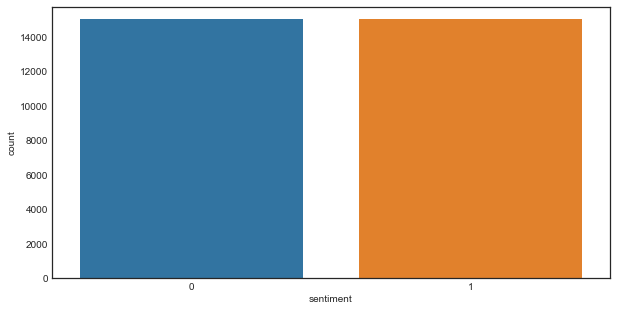

In [37]:
sns.countplot(df.sentiment)

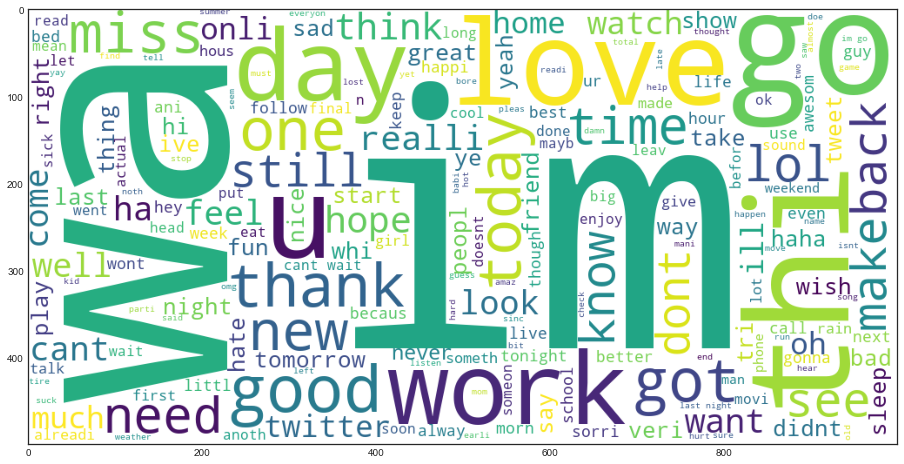

In [38]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['twitts']:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [197]:
#Tfidf vectorizer

x=df['twitts']
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,2))
x=tfidf.fit_transform(X)
y=df['sentiment']

In [198]:
x[0]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [200]:
#Multinomial

mnb=MultinomialNB()
mnb.fit(x_train,y_train)


mnb_predict=mnb.predict(x_test)
print(mnb_predict)

cf = confusion_matrix(y_test,mnb_predict, labels=[1,0])
print(cf)

print(classification_report(y_test,mnb_predict))

In [125]:
#SVM

svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm.fit(x_train, y_train)


svm_predict=svm.predict(x_test)
print(svm_predict)

cf = confusion_matrix(y_test,svm_predict, labels=[1,0])
print(cf)

print(classification_report(y_test,svm_predict))

# LogisticRegression

In [201]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr.fit(x_train, y_train)
lr_bow_predict=lr.predict(x_test)
print(lr_bow_predict)

[0 0 1 ... 0 1 0]


In [202]:
cf = confusion_matrix(y_test,lr_bow_predict, labels=[1,0])
print(cf)

[[2269  677]
 [ 722 2332]]


In [203]:
print(classification_report(y_test,lr_bow_predict))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3054
           1       0.76      0.77      0.76      2946

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



# Linear SVC

In [204]:

from sklearn.pipeline import Pipeline
classifier = LinearSVC()

In [205]:
clf=LinearSVC()

clf.fit(x_train, y_train)

LinearSVC()

In [206]:
y_pred=clf.predict(x_test)

In [207]:
cf = confusion_matrix(y_test,y_pred, labels=[1,0])
print(cf)

[[2222  724]
 [ 809 2245]]


In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3054
           1       0.73      0.75      0.74      2946

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [209]:
xx='i lithin bad '
vec=tfidf.transform([xx])
clf.predict(vec)
if(clf.predict(vec)==0):
    print('neg')
else:
    print('good')

neg


In [1]:
clf = Pipeline([('tfidf', tfidf), ('clf', clf)])

NameError: name 'Pipeline' is not defined

In [230]:
import pickle

In [231]:
pickle.dump(clf,open('sentiment_model_SVC.pkl' , 'wb'))

In [232]:
m=pickle.load(open('sentiment_model_SVC.pkl','rb'))

In [214]:
m

LinearSVC()

# TENSORFLOW MODEL

In [216]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tweets=X
tokenizer.fit_on_texts(tweets)

In [217]:
encoded_docs = tokenizer.texts_to_sequences(tweets)
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [218]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [219]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'and': 6, 'you': 7, 'is': 8, 'it': 9, 'in': 10, 'for': 11, 'of': 12, 'me': 13, 'on': 14, 'so': 15, 'that': 16, 'have': 17, 'but': 18, "i'm": 19, 'just': 20, 'with': 21, 'at': 22, 'be': 23, 'not': 24, 'was': 25, 'this': 26, 'now': 27, 'good': 28, 'up': 29, 'day': 30, 'out': 31, 'like': 32, 'all': 33, 'are': 34, 'get': 35, 'no': 36, 'quot': 37, 'go': 38, 'http': 39, "it's": 40, 'do': 41, 'today': 42, 'too': 43, 'your': 44, 'work': 45, 'love': 46, 'going': 47, 'got': 48, 'lol': 49, 'back': 50, 'u': 51, 'time': 52, 'know': 53, 'from': 54, 'com': 55, 'one': 56, 'about': 57, 'what': 58, 'will': 59, "don't": 60, 'im': 61, 'am': 62, 'really': 63, 'can': 64, 'we': 65, "can't": 66, 'amp': 67, 'had': 68, 'see': 69, 'if': 70, 'its': 71, 'still': 72, 'how': 73, 'night': 74, 'some': 75, 'new': 76, 'well': 77, 'when': 78, 'want': 79, '2': 80, 'much': 81, 'think': 82, 'oh': 83, 'thanks': 84, 'miss': 85, 'as': 86, 'home': 87, 'there': 88, 'here': 89, 'they':

In [220]:
print(tweets[0])
print(encoded_docs[0])

@robbiebronniman Sounds like a great night. 
[339, 32, 4, 101, 74]


In [221]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 339  32   4
 101  74]


In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           1334336   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,350,987
Trainable params: 1,350,987
Non-trainable params: 0
____________________________________________

In [223]:
history = model.fit(padded_sequence,y,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
750/750 [==============================] - 83s 109ms/step - loss: 0.5845 - accuracy: 0.6813 - val_loss: 0.5080 - val_accuracy: 0.7590
Epoch 2/5
750/750 [==============================] - 84s 112ms/step - loss: 0.4818 - accuracy: 0.7730 - val_loss: 0.5015 - val_accuracy: 0.7625
Epoch 3/5
750/750 [==============================] - 82s 109ms/step - loss: 0.4514 - accuracy: 0.7927 - val_loss: 0.4988 - val_accuracy: 0.7657
Epoch 4/5
750/750 [==============================] - 84s 112ms/step - loss: 0.4310 - accuracy: 0.8056 - val_loss: 0.5022 - val_accuracy: 0.7660
Epoch 5/5
750/750 [==============================] - 87s 116ms/step - loss: 0.4160 - accuracy: 0.8150 - val_loss: 0.5146 - val_accuracy: 0.7588


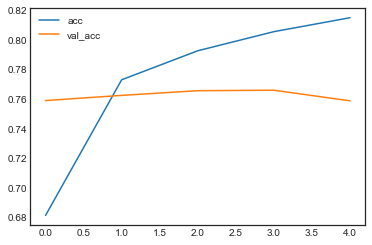

<Figure size 432x288 with 0 Axes>

In [224]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

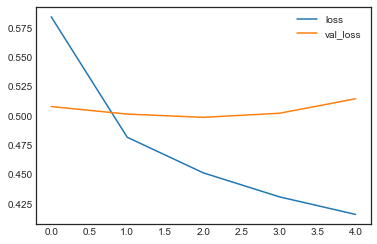

<Figure size 432x288 with 0 Axes>

In [225]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [226]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", prediction)

In [227]:
test_sentence1 = "I good my journey on this flight."
predict_sentiment(test_sentence1)

Predicted label:  1


In [228]:
test_sentence2 = "This is the bad flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  0
